<a href="https://colab.research.google.com/github/mujtaba86/final-ml/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== First few rows of the dataset ===
   network_packet_size protocol_type  login_attempts  session_duration  \
0                  599           TCP               4        492.983263   
1                  472           TCP               3       1557.996461   
2                  629           TCP               3         75.044262   
3                  804           UDP               4        601.248835   
4                  453           TCP               5        532.540888   

  encryption_used  ip_reputation_score  failed_logins browser_type  \
0             DES             0.606818              1         Edge   
1             DES             0.301569              0      Firefox   
2             DES             0.739164              2       Chrome   
3             DES             0.123267              0      Unknown   
4             AES             0.054874              1      Firefox   

   unusual_time_access  attack_detected  
0                    0                1  
1           

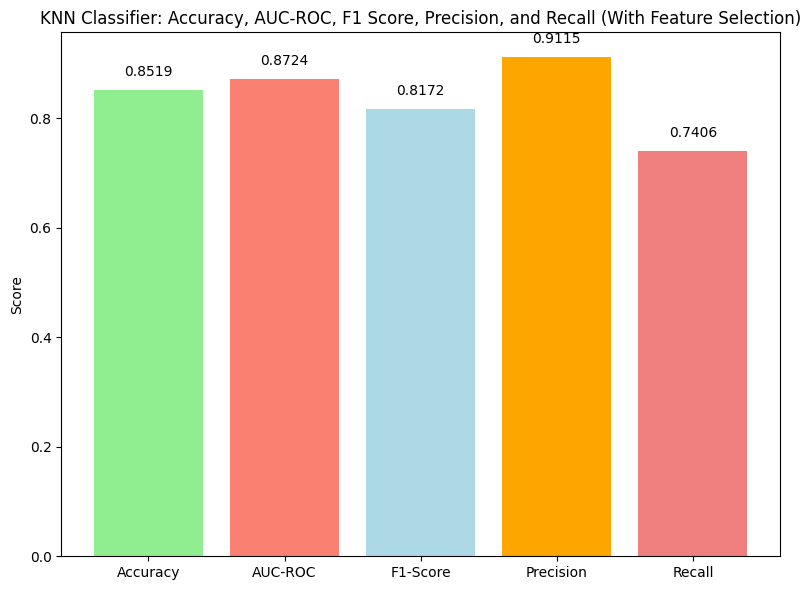


--- K-Nearest Neighbors (KNN) without Feature Selection ---

F1 Score (KNN) - Without Feature Selection: 0.4381
Accuracy (KNN) - Without Feature Selection: 0.5304
Precision (KNN) - Without Feature Selection: 0.4712
Recall (KNN) - Without Feature Selection: 0.4094
AUC-ROC (KNN) - Without Feature Selection: 0.5202

Classification Report (KNN) - Without Feature Selection:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1582
           1       0.47      0.41      0.44      1280

    accuracy                           0.53      2862
   macro avg       0.52      0.52      0.52      2862
weighted avg       0.52      0.53      0.53      2862



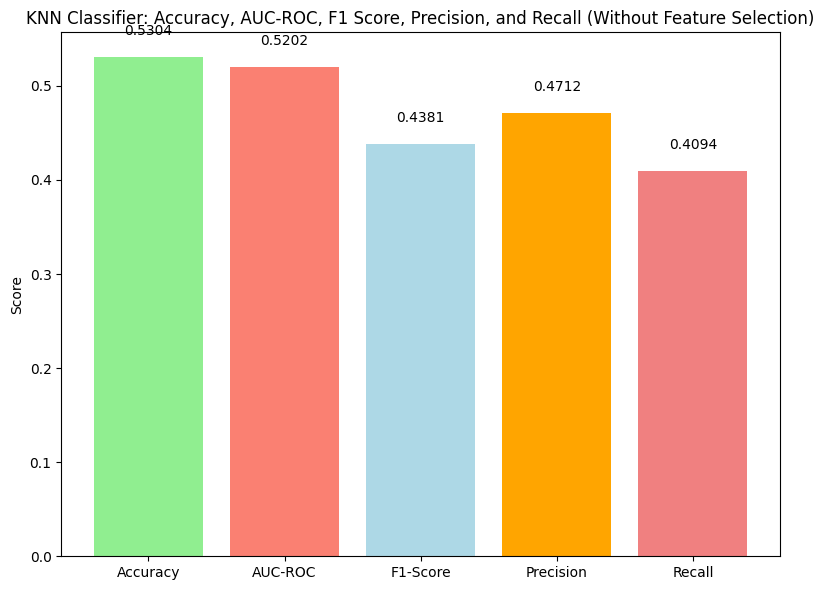

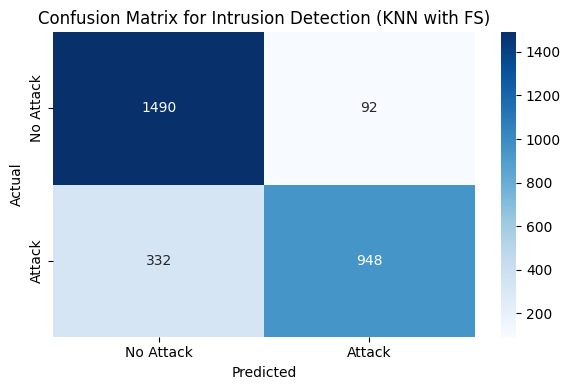


--- Training Decision Tree with Feature Selection ---

F1 Score (Decision Tree with FS): 0.8024
Accuracy (Decision Tree with FS): 0.8249
Precision (Decision Tree with FS): 0.8104
Recall (Decision Tree with FS): 0.7945
AUC-ROC (Decision Tree with FS): 0.8220

Classification Report (Decision Tree with FS):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1582
           1       0.81      0.79      0.80      1280

    accuracy                           0.82      2862
   macro avg       0.82      0.82      0.82      2862
weighted avg       0.82      0.82      0.82      2862



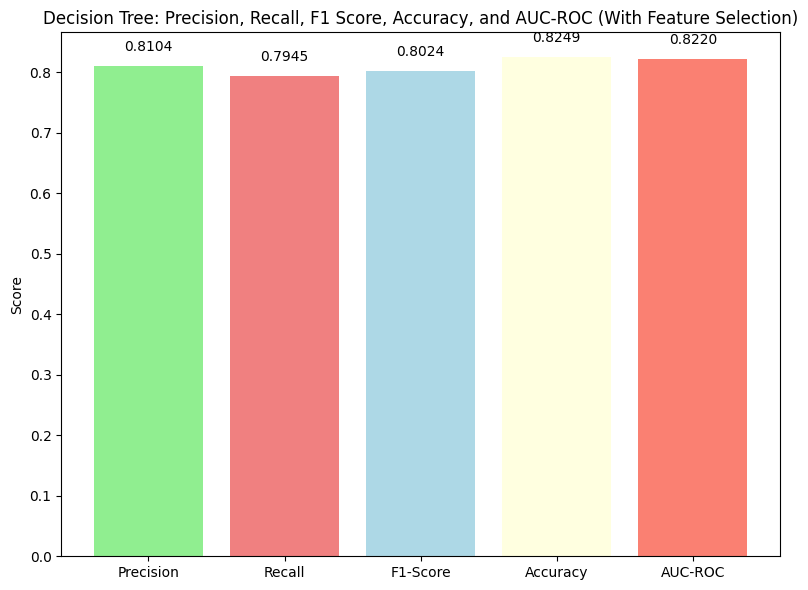

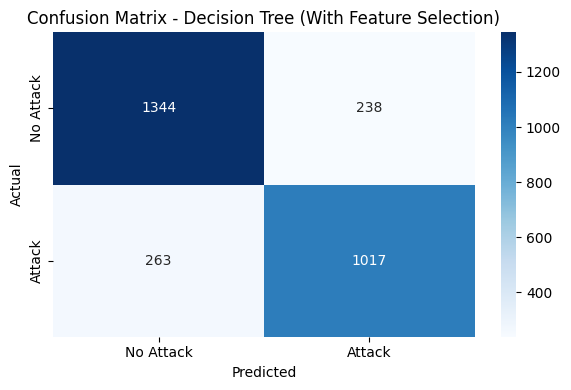


--- Training Decision Tree without Feature Selection ---

F1 Score (Decision Tree without FS): 0.7936
Accuracy (Decision Tree without FS): 0.8166
Precision (Decision Tree without FS): 0.7989
Recall (Decision Tree without FS): 0.7883
AUC-ROC (Decision Tree without FS): 0.8139

Classification Report (Decision Tree without FS):
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1582
           1       0.80      0.79      0.79      1280

    accuracy                           0.82      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.82      0.82      0.82      2862



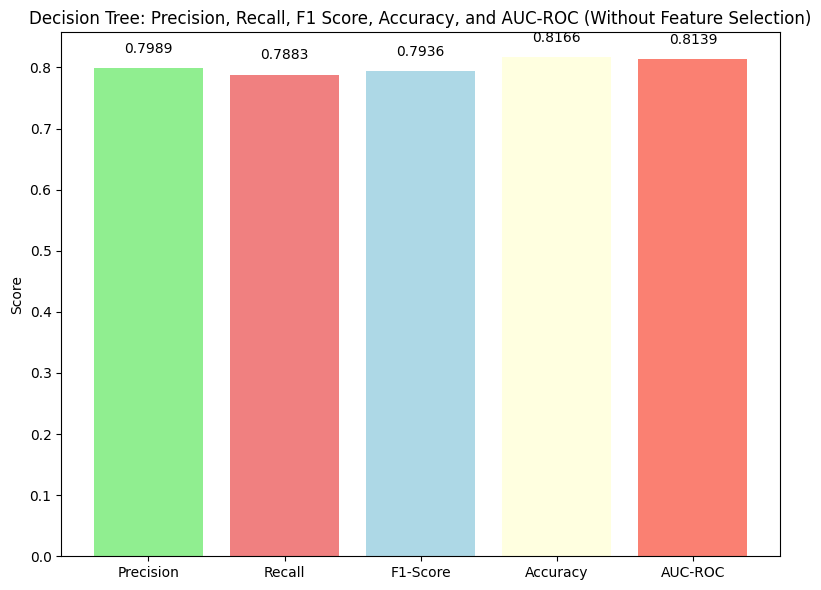

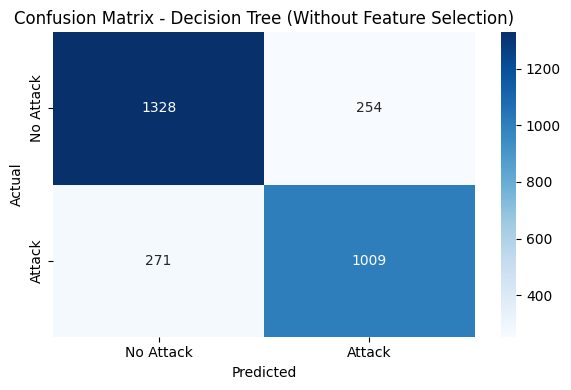


--- Training Logistic Regression with Feature Selection ---

F1 Score (Logistic Regression with FS): 0.6805
Accuracy (Logistic Regression with FS): 0.7254
Precision (Logistic Regression with FS): 0.7093
Recall (Logistic Regression with FS): 0.6539
AUC-ROC (Logistic Regression with FS): 0.7892

Classification Report (Logistic Regression with FS):
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1582
           1       0.71      0.65      0.68      1280

    accuracy                           0.73      2862
   macro avg       0.72      0.72      0.72      2862
weighted avg       0.72      0.73      0.72      2862



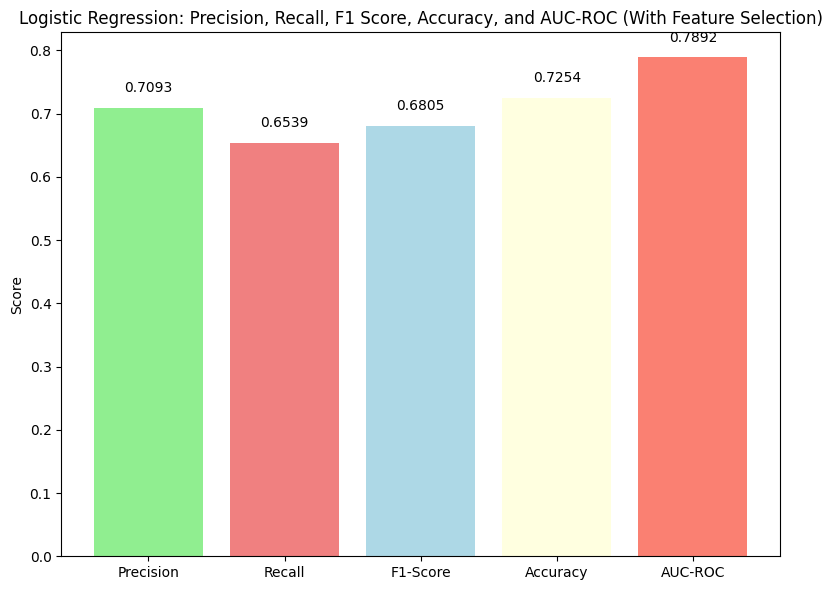

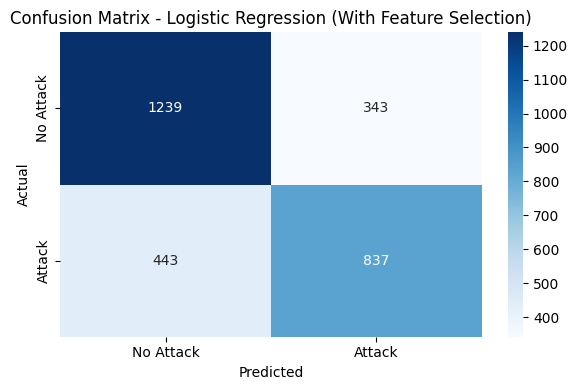


--- Training Logistic Regression without Feature Selection ---

F1 Score (Logistic Regression without FS): 0.6846
Accuracy (Logistic Regression without FS): 0.7299
Precision (Logistic Regression without FS): 0.7165
Recall (Logistic Regression without FS): 0.6555
AUC-ROC (Logistic Regression without FS): 0.7890

Classification Report (Logistic Regression without FS):
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1582
           1       0.72      0.66      0.68      1280

    accuracy                           0.73      2862
   macro avg       0.73      0.72      0.72      2862
weighted avg       0.73      0.73      0.73      2862



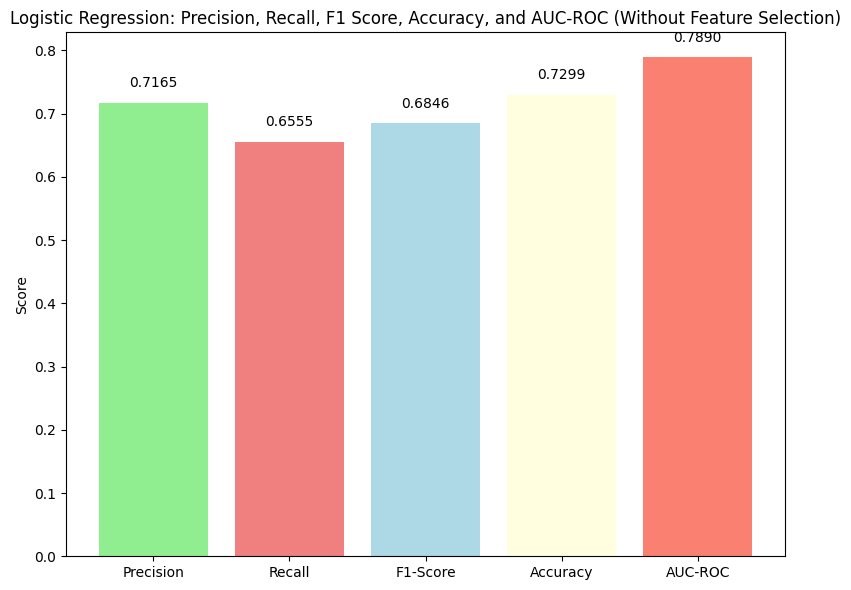

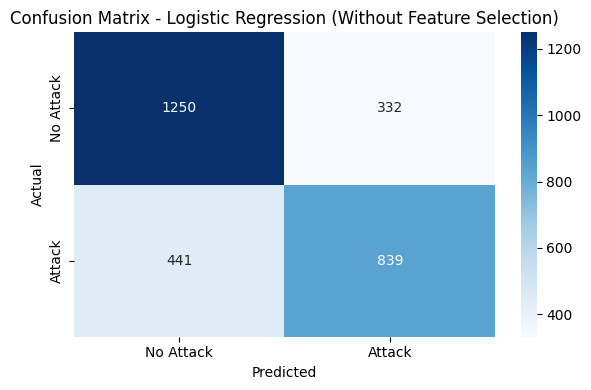

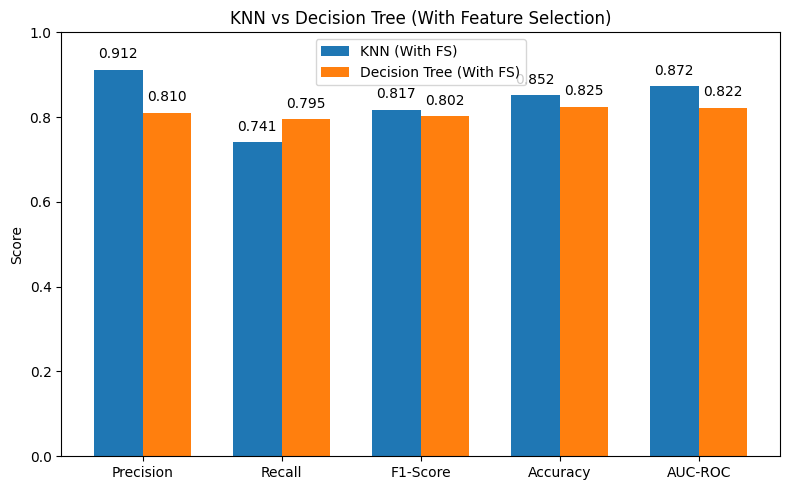

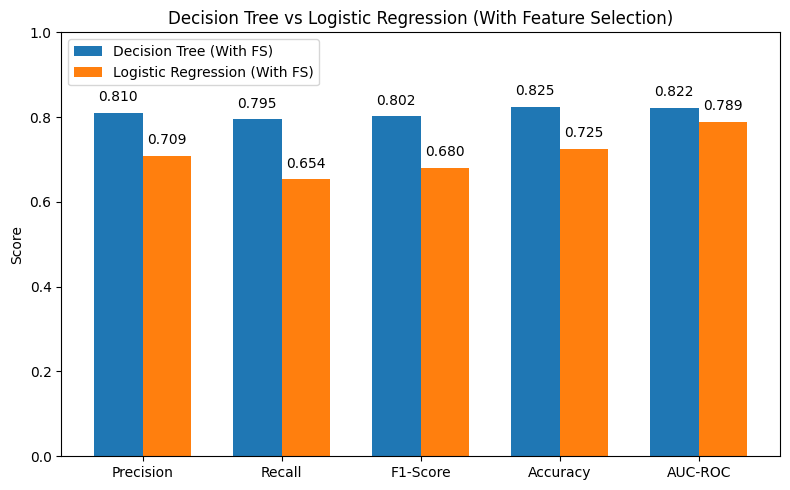

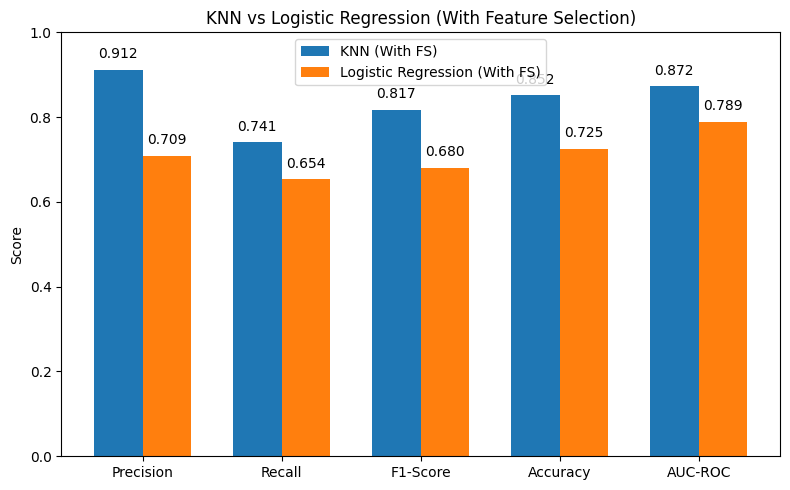

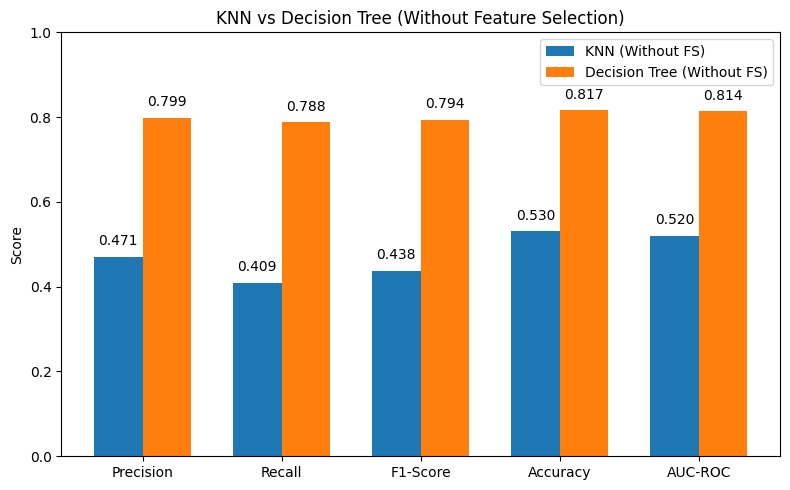

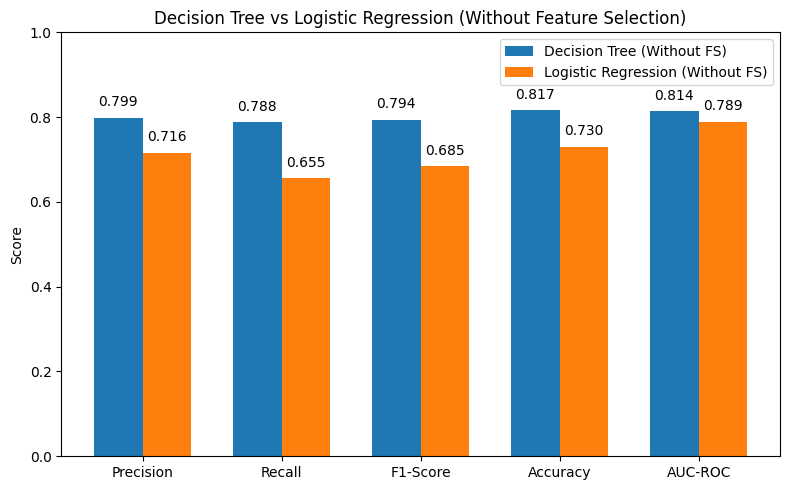

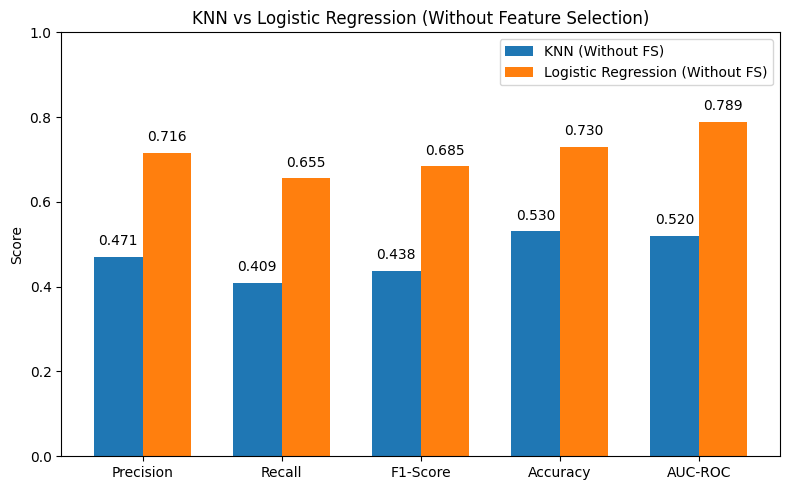

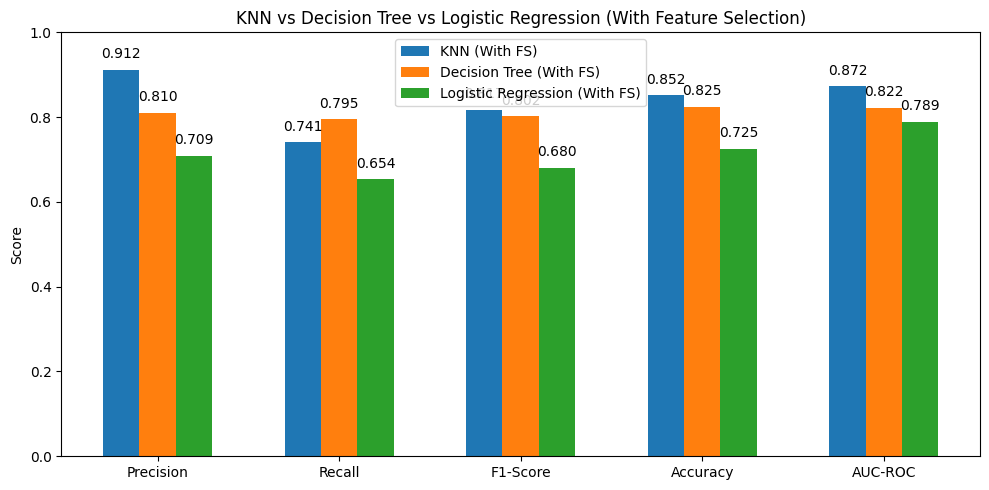

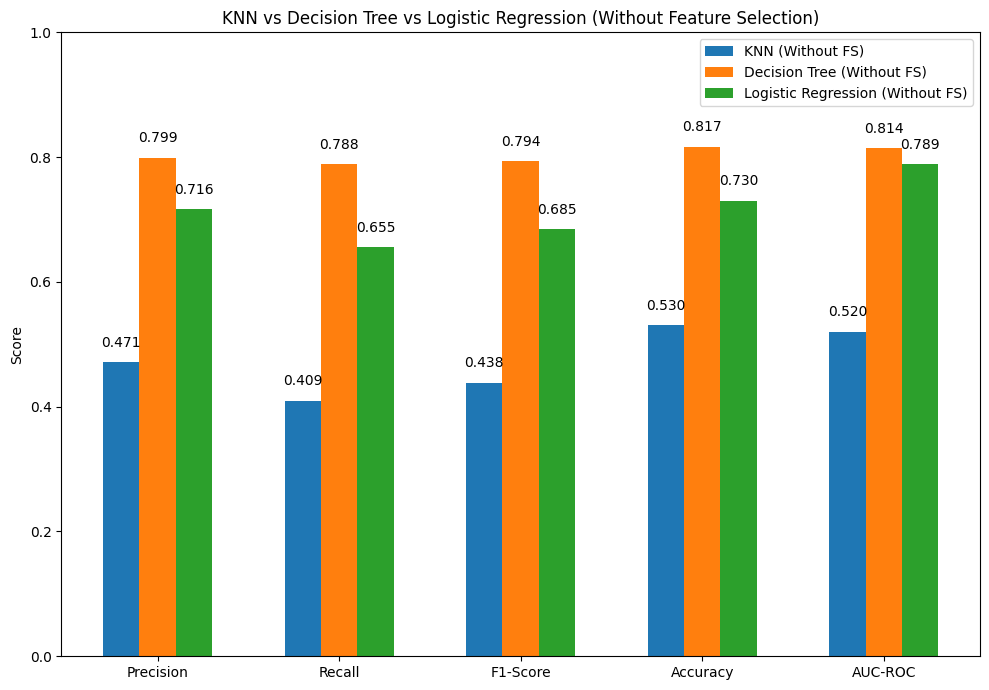

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

# Load the dataset from the uploaded file
df = pd.read_csv('int.csv')

# 1. Data Description
# Drop the session_id as it is an identifier and not a predictive feature
df = df.drop('session_id', axis=1)

# Display the first few rows of the dataset
print("=== First few rows of the dataset ===")
print(df.head())

# Check data structure, missing values, and types
print("\n=== Dataset Structure ===")
df.info()

# Get summary statistics for numerical columns
print("\n=== Summary Statistics ===")
print(df.describe())

# Inspect the distribution of categorical columns (e.g., 'attack_detected')
print("\n=== Value counts for categorical columns ===")
print(df['attack_detected'].value_counts())

# 2. Preprocess the Data
# One-hot encode categorical features. This converts categories into a numerical format.
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'encryption_used', 'browser_type'], drop_first=True)

# Separate features (X) from the target variable (y)
X = df_encoded.drop('attack_detected', axis=1)
y = df_encoded['attack_detected']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Apply Feature Selection (SelectKBest with chi2)
k_best_count = 5  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k_best_count)

# Fit the selector to the training data and transform it
X_train_kbest = selector.fit_transform(X_train, y_train)

# Transform the test data using the same fitted selector
X_test_kbest = selector.transform(X_test)

# Get the names of the selected features for reference
selected_features_mask = selector.get_support()
selected_features_names = X_train.columns[selected_features_mask]
print(f"Selected the top {k_best_count} features: {list(selected_features_names)}\n")

# 4. Scale Selected Features for KNN (With Feature Selection)
# KNN is sensitive to the scale of data, so we scale the selected features.
scaler = StandardScaler()
X_train_kbest_scaled = scaler.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler.transform(X_test_kbest)

# --- Heading for KNN with Feature Selection ---
print("\n--- K-Nearest Neighbors (KNN) with Feature Selection ---")

# 5. Train and Evaluate K-Nearest Neighbors (KNN) with Feature Selection
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_kbest_scaled, y_train)
y_pred_knn = knn.predict(X_test_kbest_scaled)

# Calculate metrics for KNN with feature selection
f1_knn = f1_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision']
recall_knn = classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall']
y_pred_prob_knn = knn.predict_proba(X_test_kbest_scaled)[:, 1]  # For AUC-ROC, we need probabilities
auc_roc_knn = roc_auc_score(y_test, y_pred_prob_knn)

# Print metrics for KNN with feature selection
print(f"\nF1 Score (KNN with FS): {f1_knn:.4f}")
print(f"Accuracy (KNN with FS): {accuracy_knn:.4f}")
print(f"Precision (KNN with FS): {precision_knn:.4f}")
print(f"Recall (KNN with FS): {recall_knn:.4f}")
print(f"AUC-ROC (KNN with FS): {auc_roc_knn:.4f}")
print("\nClassification Report (KNN with FS):")
print(classification_report(y_test, y_pred_knn))

# 6. Bar Chart to visualize all metrics (With Feature Selection)
metrics = [accuracy_knn, auc_roc_knn, f1_knn, precision_knn, recall_knn]
metrics_labels = ['Accuracy', 'AUC-ROC', 'F1-Score', 'Precision', 'Recall']

# Create a bar chart for KNN with Feature Selection
plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics, color=['lightgreen', 'salmon', 'lightblue', 'orange', 'lightcoral'])

# Add the values on top of the bars
for i, value in enumerate(metrics):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom', color='black')

# Add titles and labels
plt.title('KNN Classifier: Accuracy, AUC-ROC, F1 Score, Precision, and Recall (With Feature Selection)')
plt.ylabel('Score')
plt.tight_layout()

# Show the plot
plt.show()
# --- KNN without Feature Selection ---
print("\n--- K-Nearest Neighbors (KNN) without Feature Selection ---")
# Train the model on the scaled training data (without feature selection)
knn.fit(X_train, y_train)
y_pred_knn_no_fs = knn.predict(X_test)

# Calculate all 5 metrics (without feature selection)
f1_knn_no_fs = f1_score(y_test, y_pred_knn_no_fs)
accuracy_knn_no_fs = accuracy_score(y_test, y_pred_knn_no_fs)
precision_knn_no_fs = classification_report(y_test, y_pred_knn_no_fs, output_dict=True)['1']['precision']
recall_knn_no_fs = classification_report(y_test, y_pred_knn_no_fs, output_dict=True)['1']['recall']
y_pred_prob_knn_no_fs = knn.predict_proba(X_test)[:, 1]  # For AUC-ROC, we need probabilities
auc_roc_knn_no_fs = roc_auc_score(y_test, y_pred_prob_knn_no_fs)

# Print the F1 score, Accuracy, Precision, Recall, and AUC-ROC (without feature selection)
print(f"\nF1 Score (KNN) - Without Feature Selection: {f1_knn_no_fs:.4f}")
print(f"Accuracy (KNN) - Without Feature Selection: {accuracy_knn_no_fs:.4f}")
print(f"Precision (KNN) - Without Feature Selection: {precision_knn_no_fs:.4f}")
print(f"Recall (KNN) - Without Feature Selection: {recall_knn_no_fs:.4f}")
print(f"AUC-ROC (KNN) - Without Feature Selection: {auc_roc_knn_no_fs:.4f}")
print("\nClassification Report (KNN) - Without Feature Selection:")
print(classification_report(y_test, y_pred_knn_no_fs))

# 8. Bar Chart to visualize metrics for KNN without Feature Selection
metrics_no_fs = [accuracy_knn_no_fs, auc_roc_knn_no_fs, f1_knn_no_fs, precision_knn_no_fs, recall_knn_no_fs]

# Create a bar chart for KNN without feature selection
plt.figure(figsize=(8, 6))
plt.bar(metrics_labels, metrics_no_fs, color=['lightgreen', 'salmon', 'lightblue', 'orange', 'lightcoral'])

# Add the values on top of the bars
for i, value in enumerate(metrics_no_fs):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom', color='black')

# Add titles and labels
plt.title('KNN Classifier: Accuracy, AUC-ROC, F1 Score, Precision, and Recall (Without Feature Selection)')
plt.ylabel('Score')
plt.tight_layout()

# Show the plot
plt.show()

# 7. Confusion Matrix Visualization (With Feature Selection)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix for Intrusion Detection (KNN with FS)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Decision Tree with Feature Selection ---
print("\n--- Training Decision Tree with Feature Selection ---")

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the selected (with feature selection) training data
dt.fit(X_train_kbest, y_train)

# Make predictions on the selected test data
y_pred_dt = dt.predict(X_test_kbest)

# Calculate the F1 score, Accuracy, and AUC-ROC (With Feature Selection)
f1_dt = f1_score(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
precision_dt = report_dt['1']['precision']
recall_dt = report_dt['1']['recall']
y_pred_prob_dt = dt.predict_proba(X_test_kbest)[:, 1]  # For AUC-ROC, we need probabilities
auc_roc_dt = roc_auc_score(y_test, y_pred_prob_dt)

# Print metrics for Decision Tree with feature selection
print(f"\nF1 Score (Decision Tree with FS): {f1_dt:.4f}")
print(f"Accuracy (Decision Tree with FS): {accuracy_dt:.4f}")
print(f"Precision (Decision Tree with FS): {precision_dt:.4f}")
print(f"Recall (Decision Tree with FS): {recall_dt:.4f}")
print(f"AUC-ROC (Decision Tree with FS): {auc_roc_dt:.4f}")
print("\nClassification Report (Decision Tree with FS):")
print(classification_report(y_test, y_pred_dt))

# 1. Bar Chart for Decision Tree Metrics (With Feature Selection)
metrics_dt = [precision_dt, recall_dt, f1_dt, accuracy_dt, auc_roc_dt]
labels_dt = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC-ROC']

plt.figure(figsize=(8, 6))
plt.bar(labels_dt, metrics_dt, color=['lightgreen', 'lightcoral', 'lightblue', 'lightyellow', 'salmon'])

# Add values on top of the bars
for i, value in enumerate(metrics_dt):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom')

plt.title('Decision Tree: Precision, Recall, F1 Score, Accuracy, and AUC-ROC (With Feature Selection)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# 2. Confusion Matrix for Decision Tree (With Feature Selection)
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attack", "Attack"],
            yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix - Decision Tree (With Feature Selection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# --- Decision Tree without Feature Selection ---
print("\n--- Training Decision Tree without Feature Selection ---")

# Train the model on the full (without feature selection) training data
dt.fit(X_train, y_train)

# Make predictions on the test data (without feature selection)
y_pred_dt_no_fs = dt.predict(X_test)

# Calculate the F1 score, Accuracy, and AUC-ROC (Without Feature Selection)
f1_dt_no_fs = f1_score(y_test, y_pred_dt_no_fs)
accuracy_dt_no_fs = accuracy_score(y_test, y_pred_dt_no_fs)
report_dt_no_fs = classification_report(y_test, y_pred_dt_no_fs, output_dict=True)
precision_dt_no_fs = report_dt_no_fs['1']['precision']
recall_dt_no_fs = report_dt_no_fs['1']['recall']
y_pred_prob_dt_no_fs = dt.predict_proba(X_test)[:, 1]  # For AUC-ROC, we need probabilities
auc_roc_dt_no_fs = roc_auc_score(y_test, y_pred_prob_dt_no_fs)

# Print metrics for Decision Tree without feature selection
print(f"\nF1 Score (Decision Tree without FS): {f1_dt_no_fs:.4f}")
print(f"Accuracy (Decision Tree without FS): {accuracy_dt_no_fs:.4f}")
print(f"Precision (Decision Tree without FS): {precision_dt_no_fs:.4f}")
print(f"Recall (Decision Tree without FS): {recall_dt_no_fs:.4f}")
print(f"AUC-ROC (Decision Tree without FS): {auc_roc_dt_no_fs:.4f}")
print("\nClassification Report (Decision Tree without FS):")
print(classification_report(y_test, y_pred_dt_no_fs))

# 3. Bar Chart for Decision Tree Metrics (Without Feature Selection)
metrics_dt_no_fs = [precision_dt_no_fs, recall_dt_no_fs, f1_dt_no_fs, accuracy_dt_no_fs, auc_roc_dt_no_fs]
labels_dt_no_fs = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC-ROC']

plt.figure(figsize=(8, 6))
plt.bar(labels_dt_no_fs, metrics_dt_no_fs, color=['lightgreen', 'lightcoral', 'lightblue', 'lightyellow', 'salmon'])

# Add values on top of the bars
for i, value in enumerate(metrics_dt_no_fs):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom')

plt.title('Decision Tree: Precision, Recall, F1 Score, Accuracy, and AUC-ROC (Without Feature Selection)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# 4. Confusion Matrix for Decision Tree (Without Feature Selection)
cm_dt_no_fs = confusion_matrix(y_test, y_pred_dt_no_fs)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt_no_fs, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attack", "Attack"],
            yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix - Decision Tree (Without Feature Selection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- Import Needed Modules ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================
# 0. SCALE ALL FEATURES (NO FS BRANCH!)
# ======================================
scaler_all = StandardScaler()
X_train_scaled = scaler_all.fit_transform(X_train)   # <-- THIS WAS MISSING
X_test_scaled = scaler_all.transform(X_test)

# --- Logistic Regression with Feature Selection ---
print("\n--- Training Logistic Regression with Feature Selection ---")

# Train on feature-selected, scaled data
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_kbest_scaled, y_train)
y_pred_lr = lr.predict(X_test_kbest_scaled)
y_pred_prob_lr = lr.predict_proba(X_test_kbest_scaled)[:, 1]

# Metrics
f1_lr = f1_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision']
recall_lr = classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall']
auc_roc_lr = roc_auc_score(y_test, y_pred_prob_lr)

print(f"\nF1 Score (Logistic Regression with FS): {f1_lr:.4f}")
print(f"Accuracy (Logistic Regression with FS): {accuracy_lr:.4f}")
print(f"Precision (Logistic Regression with FS): {precision_lr:.4f}")
print(f"Recall (Logistic Regression with FS): {recall_lr:.4f}")
print(f"AUC-ROC (Logistic Regression with FS): {auc_roc_lr:.4f}")
print("\nClassification Report (Logistic Regression with FS):")
print(classification_report(y_test, y_pred_lr))

# Bar Chart for LR with FS
metrics_lr = [precision_lr, recall_lr, f1_lr, accuracy_lr, auc_roc_lr]
labels_lr = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC-ROC']

plt.figure(figsize=(8, 6))
plt.bar(labels_lr, metrics_lr, color=['lightgreen', 'lightcoral', 'lightblue', 'lightyellow', 'salmon'])
for i, value in enumerate(metrics_lr):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom')
plt.title('Logistic Regression: Precision, Recall, F1 Score, Accuracy, and AUC-ROC (With Feature Selection)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Confusion Matrix for LR with FS
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attack", "Attack"],
            yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix - Logistic Regression (With Feature Selection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --- Logistic Regression without Feature Selection ---
print("\n--- Training Logistic Regression without Feature Selection ---")

# Train on ALL features (scaled), no selection
lr.fit(X_train_scaled, y_train)
y_pred_lr_no_fs = lr.predict(X_test_scaled)
y_pred_prob_lr_no_fs = lr.predict_proba(X_test_scaled)[:, 1]

# Metrics
f1_lr_no_fs = f1_score(y_test, y_pred_lr_no_fs)
accuracy_lr_no_fs = accuracy_score(y_test, y_pred_lr_no_fs)
precision_lr_no_fs = classification_report(y_test, y_pred_lr_no_fs, output_dict=True)['1']['precision']
recall_lr_no_fs = classification_report(y_test, y_pred_lr_no_fs, output_dict=True)['1']['recall']
auc_roc_lr_no_fs = roc_auc_score(y_test, y_pred_prob_lr_no_fs)

print(f"\nF1 Score (Logistic Regression without FS): {f1_lr_no_fs:.4f}")
print(f"Accuracy (Logistic Regression without FS): {accuracy_lr_no_fs:.4f}")
print(f"Precision (Logistic Regression without FS): {precision_lr_no_fs:.4f}")
print(f"Recall (Logistic Regression without FS): {recall_lr_no_fs:.4f}")
print(f"AUC-ROC (Logistic Regression without FS): {auc_roc_lr_no_fs:.4f}")
print("\nClassification Report (Logistic Regression without FS):")
print(classification_report(y_test, y_pred_lr_no_fs))

# Bar Chart for LR without FS
metrics_lr_no_fs = [precision_lr_no_fs, recall_lr_no_fs, f1_lr_no_fs, accuracy_lr_no_fs, auc_roc_lr_no_fs]
labels_lr_no_fs = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC-ROC']

plt.figure(figsize=(8, 6))
plt.bar(labels_lr_no_fs, metrics_lr_no_fs, color=['lightgreen', 'lightcoral', 'lightblue', 'lightyellow', 'salmon'])
for i, value in enumerate(metrics_lr_no_fs):
    plt.text(i, value + 0.02, f"{value:.4f}", ha='center', va='bottom')
plt.title('Logistic Regression: Precision, Recall, F1 Score, Accuracy, and AUC-ROC (Without Feature Selection)')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Confusion Matrix for LR without FS
cm_lr_no_fs = confusion_matrix(y_test, y_pred_lr_no_fs)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_no_fs, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attack", "Attack"],
            yticklabels=["No Attack", "Attack"])
plt.title("Confusion Matrix - Logistic Regression (Without Feature Selection)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# --- ASSUMES these variables are already defined: ---
# KNN, Decision Tree, Logistic Regression metrics with and without feature selection
# precision_knn_fs, recall_knn_fs, f1_knn_fs, accuracy_knn_fs, auc_roc_knn_fs
# precision_knn_nfs, recall_knn_nfs, f1_knn_nfs, accuracy_knn_nfs, auc_roc_knn_nfs
# precision_dt_fs, recall_dt_fs, f1_dt_fs, accuracy_dt_fs, auc_roc_dt_fs
# precision_dt_nfs, recall_dt_nfs, f1_dt_nfs, accuracy_dt_nfs, auc_roc_dt_nfs
# precision_lr_fs, recall_lr_fs, f1_lr_fs, accuracy_lr_fs, auc_roc_lr_fs
# precision_lr_nfs, recall_lr_nfs, f1_lr_nfs, accuracy_lr_nfs, auc_roc_lr_nfs

# Prepare metric lists for models with feature selection
knn_metrics_fs = [precision_knn, recall_knn, f1_knn, accuracy_knn, auc_roc_knn]
dt_metrics_fs  = [precision_dt, recall_dt, f1_dt, accuracy_dt, auc_roc_dt]
lr_metrics_fs  = [precision_lr, recall_lr, f1_lr, accuracy_lr, auc_roc_lr]


# Prepare metric lists for models without feature selection
knn_metrics_no_fs = [precision_knn_no_fs, recall_knn_no_fs, f1_knn_no_fs, accuracy_knn_no_fs, auc_roc_knn_no_fs]
dt_metrics_no_fs  = [precision_dt_no_fs, recall_dt_no_fs, f1_dt_no_fs, accuracy_dt_no_fs, auc_roc_dt_no_fs]
lr_metrics_no_fs  = [precision_lr_no_fs, recall_lr_no_fs, f1_lr_no_fs, accuracy_lr_no_fs, auc_roc_lr_no_fs]

# Labels for metrics
labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC-ROC']
x = np.arange(len(labels))

# Function to plot bar charts for two models
def plot_pair(a_metrics, b_metrics, a_label, b_label, title):
    width = 0.35
    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(x - width/2, a_metrics, width, label=a_label)
    bars2 = ax.bar(x + width/2, b_metrics, width, label=b_label)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 1)
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.legend()
    # Annotate bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,
                height + 0.02,
                f"{height:.3f}",
                ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

# 1. KNN vs Decision Tree (With Feature Selection)
plot_pair(knn_metrics_fs, dt_metrics_fs, 'KNN (With FS)', 'Decision Tree (With FS)', 'KNN vs Decision Tree (With Feature Selection)')

# 2. Decision Tree vs Logistic Regression (With Feature Selection)
plot_pair(dt_metrics_fs, lr_metrics_fs, 'Decision Tree (With FS)', 'Logistic Regression (With FS)', 'Decision Tree vs Logistic Regression (With Feature Selection)')

# 3. KNN vs Logistic Regression (With Feature Selection)
plot_pair(knn_metrics_fs, lr_metrics_fs, 'KNN (With FS)', 'Logistic Regression (With FS)', 'KNN vs Logistic Regression (With Feature Selection)')

# 4. KNN vs Decision Tree (Without Feature Selection)
plot_pair(knn_metrics_no_fs, dt_metrics_no_fs, 'KNN (Without FS)', 'Decision Tree (Without FS)', 'KNN vs Decision Tree (Without Feature Selection)')

# 5. Decision Tree vs Logistic Regression (Without Feature Selection)
plot_pair(dt_metrics_no_fs, lr_metrics_no_fs, 'Decision Tree (Without FS)', 'Logistic Regression (Without FS)', 'Decision Tree vs Logistic Regression (Without Feature Selection)')

# 6. KNN vs Logistic Regression (Without Feature Selection)
plot_pair(knn_metrics_no_fs, lr_metrics_no_fs, 'KNN (Without FS)', 'Logistic Regression (Without FS)', 'KNN vs Logistic Regression (Without Feature Selection)')

# 7. All three models together (With Feature Selection)
width = 0.2
fig, ax = plt.subplots(figsize=(10, 5))
bars_knn_fs = ax.bar(x - width, knn_metrics_fs, width, label='KNN (With FS)')
bars_dt_fs  = ax.bar(x, dt_metrics_fs, width, label='Decision Tree (With FS)')
bars_lr_fs  = ax.bar(x + width, lr_metrics_fs, width, label='Logistic Regression (With FS)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('KNN vs Decision Tree vs Logistic Regression (With Feature Selection)')
ax.legend()

# Annotate all bars
for bar in bars_knn_fs + bars_dt_fs + bars_lr_fs:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            h + 0.02,
            f"{h:.3f}",
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 8. All three models together (Without Feature Selection)
fig, ax = plt.subplots(figsize=(10, 7))
bars_knn_nfs = ax.bar(x - width, knn_metrics_no_fs, width, label='KNN (Without FS)')
bars_dt_nfs  = ax.bar(x, dt_metrics_no_fs, width, label='Decision Tree (Without FS)')
bars_lr_nfs  = ax.bar(x + width, lr_metrics_no_fs, width, label='Logistic Regression (Without FS)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('KNN vs Decision Tree vs Logistic Regression (Without Feature Selection)')
ax.legend()

# Annotate all bars
for bar in bars_knn_nfs + bars_dt_nfs + bars_lr_nfs:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            h + 0.02,
            f"{h:.3f}",
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

